Copyright 2022 Vasile Rus, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Logistic Regression

So far, we have looked at two broad kinds of supervised learning, classification and regression.
Classification predicts a class label for an observation (i.e., a row of the dataframe) and regression predicts a numeric value for an observation.

Logistic regression is a kind of regression that is primarily used for classification, particularly binary classification.
It does this by predicting the **probability** (technically the log-odds) of the positive class assigned label `1`.
If the probability is above a threshold, e.g .50, then this predicted numeric value is interpreted as a classification of `1`.
Otherwise, the predicted numeric value is interpreted as a classification of `0`.
So **logistic regression predicts a numeric probability that we convert into a classification.**

Logistic regression is widely used in data science classification tasks, for example to:

* categorize a person as having diabetes or not having diabetes
* categorize an incoming email as spam or not spam

Because logistic regression is also regression, it captures the relationship between an outcome/dependent variable and the predictor/independent variables in a similar way to linear regression.
The major difference is that the coefficients in logistic regression can be interpreted probabilistically, so that we can say how much more likely a predictor variable makes a positive classification.

The most common kind of logistic regression is binary logistic regression, but it is possible to have:

* Binary/binomial logistic regression
* Multiclass/Multinomial logistic regression
* Ordinal logistic regression (there is an order among the categories)

<!-- NOTE: I think this has been covered already, except maybe the hard/soft distinction -->
<!-- **What is classification?**

A classification/categorization task is about placing an object, e.g., a patient, into one of many categories, e.g. diseases, based on some characteristics of that object, e.g, patient’s symptoms.

Depending on the number of classes/categories, classification tasks are called:
* Binary/binomial vs. multi-class/multinomial classification. The simplest form of classification is binary classification, e.g., spam vs. not-spam email.
* Multinomial classification. An example is categorizing birds into one of many species.

**Hard classification vs. soft classification**
* Hard classification: The object is placed into one and only one category out of many
* Soft classification: the object is assigned to more than one category with some measure indicating the confidence of that object belonging to those categories

In this notebook, we focus on binary, hard classification tasks. -->

## What you will learn

In the sections that follow you will learn about logistic regression, an extension of linear regression, and how it can be used for classification.  
We will study the following:

- The math behind logistic regression
- Interpreting logistic regression coefficients
- Evaluating classification performance

## When to use logistic regression

Logistic regression works best when you need a classifier and want to be able to interpret the predictor variables easily, as you can with linear regression. 
Because logistic regression is fundamentally regression, it has the some assumptions of linearity and additivity, which may not be appropriate for some problems. 
Binary logistic regression is widely used and scales well, but multinomial variants typically begin to have performance problems when the number of classes is large.

## Mathematical Foundations of Logistic Regression for Binary Classification

We briefly review in this section the mathematical formulation of logistic regression for binary classification problems. 
That is, the predicted categories are just two (say, 1 or 0) and each object or instance belongs to one and only one category. 

Logistic regression expresses the relationship between the output variable, also called dependent variable, and the predictors, also called independent variables or features, in a similar way to linear regression with an additional twist. 
The additional twist is necessary in order to transform the typical continuous value of linear regression onto a categorical value (0 or 1).

**From Linear Regression to Logistic Regression**

Let us review first the basics of linear regression and then discuss how to transform the mathematical formulation of linear regression such that the outcome is categorical. 

In a typical linear regression equation, the output variable $Y$ is related to $n$ predictor variables $X_j$ ($j=1,n$) using the following linear relation, where the output $Y$ is a linear combination of the predictors $X_j$ with corresponding weights (or coefficients) $\beta_{j}$:

$$Y = {\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}$$

In linear regression, the output $Y$ has continuous values between $-\inf$ and $+\inf$. In order to map such output values to just 0 and 1, we need to apply the sigmoid or logistic function.

$$\sigma (t) = \frac{1}{1 + e^{-t}}$$

A graphical representation of the sigmoid or logistic function is shown below (from Wikipedia). 
The important part is that the output values are in the interval $(0,1)$ which is close to our goal of just predicted values 1 or 0.

<!-- 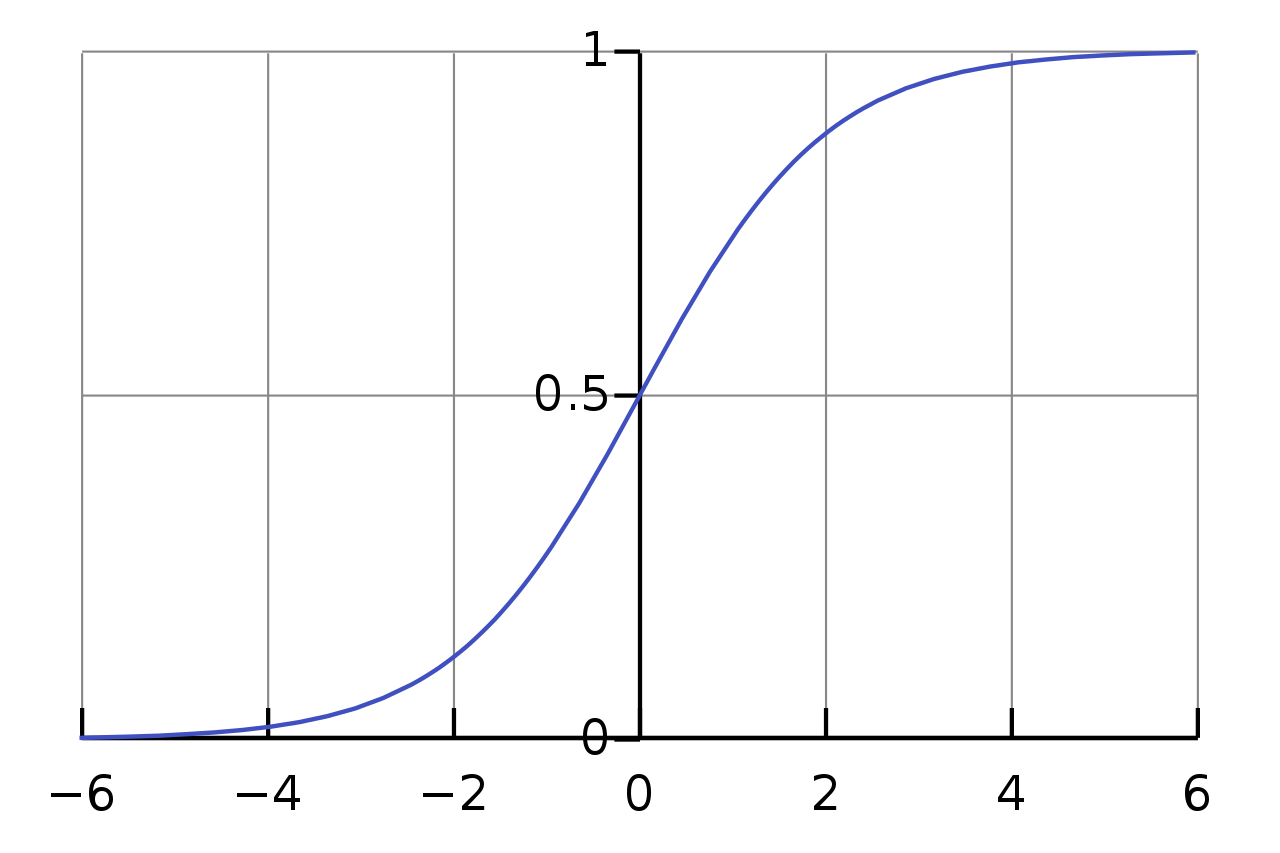 -->
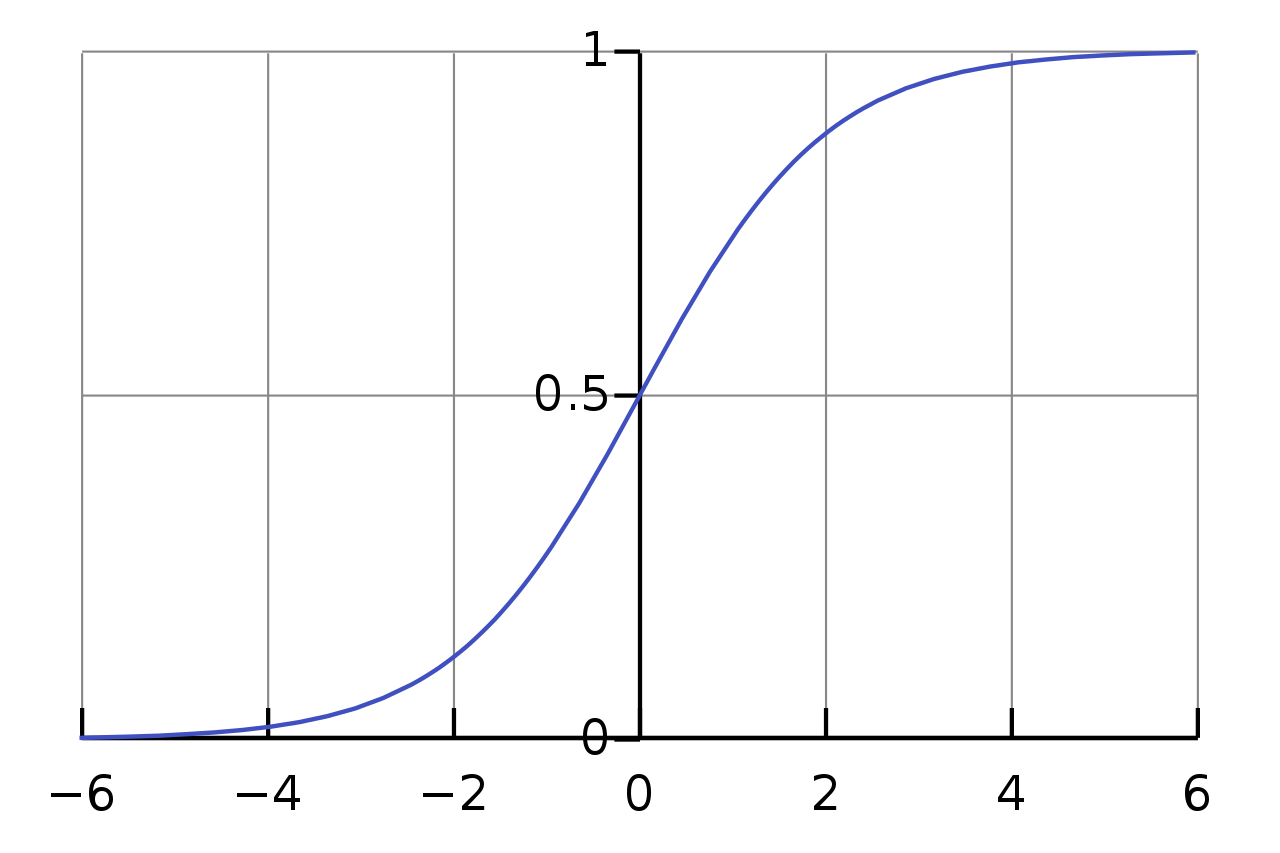

<center><b>Figure 1. The logistic function.</b> Source: <a href=\"https://commons.wikimedia.org/wiki/File:Logistic-curve.svg\">Wikipedia</a></center>


When applied to the $Y = {\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}$ from linear regression we get the following formulation for logistic regression:
$$\frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}}}$$

The net effect is that the the typical linear regression output values ranging from $-\inf$ and $+\inf$ are now bound to $(0,1)$, which is typical for probabilities. That is, the above formulation can be interpreted as estimating the probability of instance $X$ (described by all predictors $X_j$) belonging to class 1. 

$$ P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

The probability of class 0 is then:

$$ P( Y=0 | X ) = 1 - P( Y=1 | X ) $$

Values close to 0 are deemed to belong to class 0 and values close to 1 are deemed to belong to class 1, thus resulting in a categorical output which is what we intend in logistic regression.

<!-- NOTE: This is great but I think too intense at this point. The problem is that we haven't done the background in probability it seems to require. -->

<!-- # Supervised Training for Logistic Regression

In order to apply logistic regression to a particular problem, e.g., email spam classification, we need to train a logistic regression model using a supervised method, i.e., we need a training dataset consisting of expert-labeled instances of the objects we want to classify and their correct categories as judged by human experts.

During training, the best set of predictor variable weights or coefficients $\beta_{j}$ are estimated based on the training data. It is beyond the scope of this notebook to detail the details of the training process. We will just note that the objective is to find the weights that maximize how well the predicted categories match the true, actual/expert-labelled categories for all instances.

Mathematically, the goal of the training is to maximize the following expression that captures how well a set of the values of the coefficients $\beta_{j}$, i.e., a logistic model, predicts the actual classes for all training instances T:

$$Likelihood(T) = \prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The expression is called the likelihood of the training data $T$ and is defined as the product of the estimated probabilities of each training example $X_j$ given a model defined by the weights/coefficients $\beta_{j}$. For computational reasons (e.g., it is easier to work with sum of small numbers than with products of such small numbers, i.e., probabilities values between 0 and 1), we maximize the log of likelihood:

$$Log-Likelihood(T) = log (\prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})) = \sum _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The probability of an instance labeled with class $Y_i$ is in compact form: 

$$ P(Y_{j}|X_{j}; \beta_{j}) = P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j} (1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}$$

Based on this expression of the probability of each instance, we can rewrite the log-likelihood as:

$$Log-Likelihood(T) = \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} + \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

During training this expression is maximized. It can be maximized by minimizing its opposite which we can call the cost function or optimization objective for logistic regression:

$$cost-function = - Log-Likelihood(T) = - \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} - \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

Finding the weights or coefficients $beta_{j}$ that minimize the cost function can be done using various algorithms such as gradient descent. -->

# Interpreting the Coefficients in Logistic Regression

One of the best ways to interpret the coefficients in logistic regression is to transform it back into a linear regression whose coefficients are easier to interpret. 
From the earlier formulation, we know that:

$$ Y =  P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

Applying a log function on both sides, we get:

$$ log \frac{P ( Y=1 | X )}{1- P( Y=1 | X )} = \sum \limits _{j=1} ^{p}  X_{j}{\beta}_{j} $$

On the left-hand of the above expression we have the log odds defined as the ratio of the probability of class 1 versus the probability of class 0. Indeed, this expression $\frac{P ( Y=1 | X )}{1- P( Y=1 | X )}$ is the odds because $1- P( Y=1 | X )$ is the probability of class 0, i.e., $P( Y=0 | X )$.

Therefore, we conclude that the log odds are a linear regression of the predictor variables weighted by the coefficients $\beta_{j}$. Each such coefficient therefore indicates a change in the log odds when the corresponding predictor changes with a unit (in the case of numerical predictors).

You may feel more comfortable with probabilities than odds, but you have probably seen odds expressed frequently in the context of sports.
Here are some examples:

- 1 to 1 means 50% probability of winning
- 2 to 1 means 67% probability of winning
- 3 to 1 means 75% probability of winning
- 4 to 1 means 80% probability of winning

Odds are just the probability of success divided by the probability of failure.
For example 75% probability of winning means 25% probability of losing, and $.75/.25=3$, and we say the odds are 3 to 1.

Because log odds are not intuitive (for most people), it is common to interpret the coefficients of logistic regression as odds.
When a log odds coefficient has been converted to odds (using $e^\beta$), a coefficient of 1.5 means the positive class is 1.5 times more likely given a unit increase in the variable.

# Peformance Evaluation 

Performance evaluation for logistic regression is  the same as for other classification methods.
The typical performance metrics for classifiers are accuracy, precision, and recall (also called sensitivity). 
We previously talked about these, but we did not focus much on precision, so let's clarify that.

In some of our previous classification examples, there are only two classes that are equally likely (each is 50% of the data).
When classes are equally likely, we say they are **balanced**.
If our classifier is correct 60% of the time with two balanced classes, we know it is 10% better than chance.

However, sometimes things are very unbalanced.
Suppose we're trying to detect a rare disease that occurs once in 10,000 people.
In this case, a classifier that always predicts "no disease" will be correct 99.99% of the time.
This is because the **true negatives** in the data are so much greater than the **true positives**
Because the metrics of accuracy and specificity use true negatives, they can be somewhat misleading when classes are imbalanced.

In contrast, precision and recall don't use true negatives at all (see the figure below).
This makes them behave more consistently in both balanced and imbalance data.
For these reasons, precision, recall, and their combination F1 (also called f-measure) are very popular in machine learning and data science.

<!-- 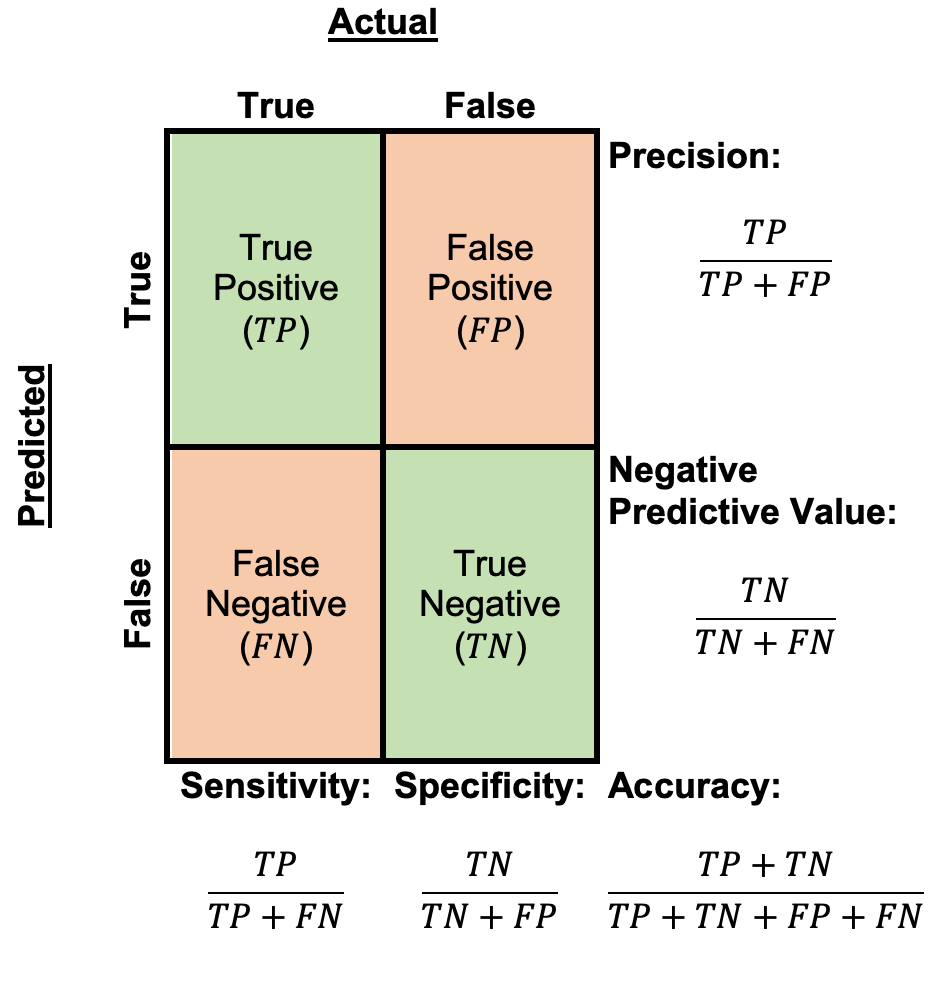 -->
<div>
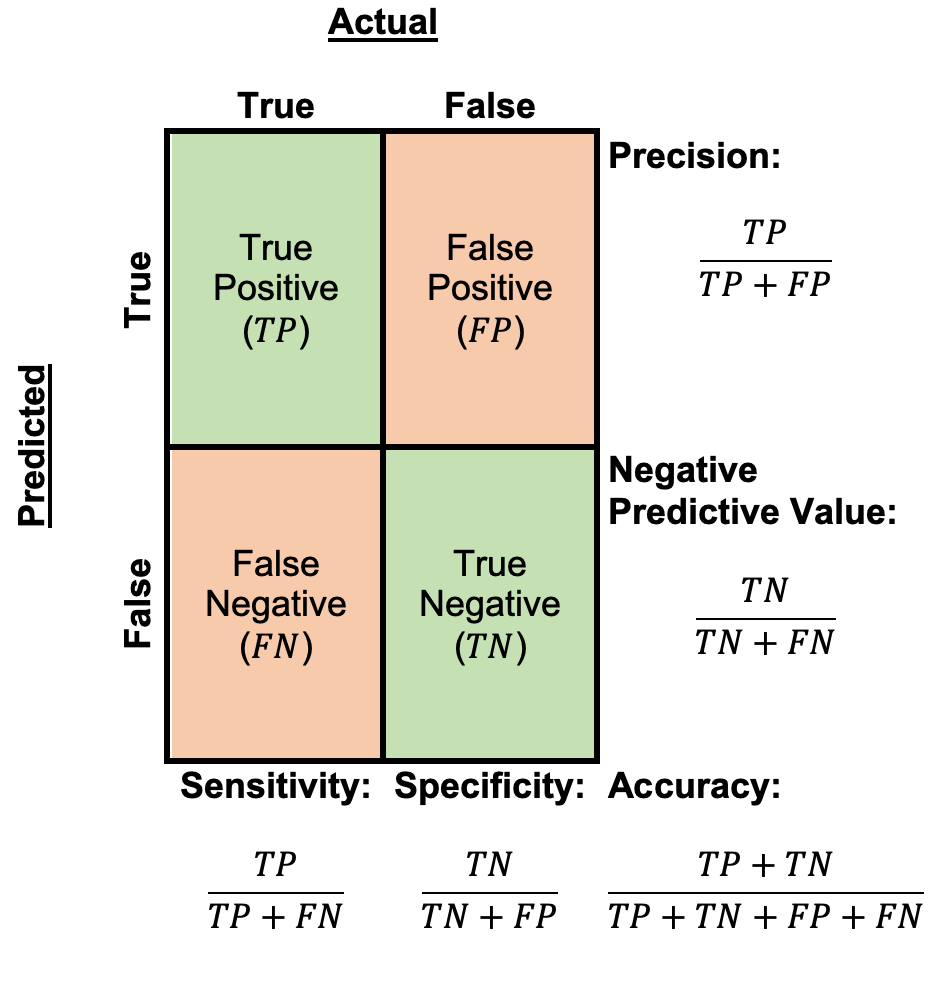
</div>

<center><b>Figure 2. A confusion matrix. Note recall is an alternate label for sensitivity. </b> </center>

<!-- NOTE: this became redundant with Tasha's KNN classification notebook. I modified to amplify precision, which she did not focus much on. -->
<!-- happens, it is easy

These are typical derived by compared the predicted output to the golden or actual output/categories in the expert labelled dataset.

For a binary classification case, we denote the category 1 as the positive category and category 0 as the negative category. Using this new terminology, When comparing the predicted categories to the actual categories we may end up with the following cases:
* True Positives (TP): instances predicted as belonging to the positive category and which in fact do belong to the positive category
* True Negatives (TN): instances predicted as belonging to the negative category and which in fact do belong to the negative category
* False Positives (FP): instances predicted as belonging to the positive category and which in fact do belong to the negative category
* False Negatives (FN): instances predicted as belonging to the negative category and which in fact do belong to the positive category

From these categories, we define the following metrics:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

Classfication methods that have a high accuracy are preferred in general although  -->
In some cases, maximizing precision or recall may be preferred. 
For instance, a high recall is highly recommended when making medical diagnosis since it is preferrable to err on mis-diagnosing someone as having cancer as opposed to missing someone who indeed has cancer, i.e., the method should try not to miss anyone who may indeed have cancer. 
This idea is sometimes referred to as **cost-sensitive classification**, because there may be an asymmetric cost toward making one kind of mistake vs. another (i.e. FN vs. FP).

In general, there is a trade-off between precision and recall. 
If precision is high then recall is low and vice versa. 
Total recall (100% recall) is achievable by always predicting the positive class, i.e., label all instances as positive, in which case precision will be very low.

In the case of logistic regression, you can imagine that we changed the threshold from .50 to a higher value like .90.
This would make many observations previously classified as 1 now classified as 0.
What was left of 1 would be very likely to be 1, since we are 90% confident (high precision).
However, we would have lost all of the 1s between 50-90% (low recall).

<!-- TODO: we need to normalize coverage of performance metrics across notebooks, particularly for classification -->

# Example: Diabetes or no Diabetes

The type of dataset and problem is a classic supervised binary classification. 
Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.


## The Pima Indians Dataset

The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes, and for this reason they have been subject of many studies.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The dataset includes data from 768 women with 8 characteristics, in particular:

| Variable | Type  | Description                                                              |
|----------|-------|:--------------------------------------------------------------------------|
| pregnant | Ratio | Number of times pregnant                                                 |
| glucose  | Ratio | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| bp       | Ratio | Diastolic blood pressure (mm Hg)                                         |
| skin     | Ratio | Triceps skin fold thickness (mm)                                         |
| insulin  | Ratio | 2-Hour serum insulin (mu U/ml)                                           |
| bmi      | Ratio | Body mass index (weight in kg/(height in m)^2)                           |
| pedigree | Ratio | Diabetes pedigree function                                               |
| age      | Ratio | Age (years)                                                              |
| label    | Ratio | Diagnosed with diabetes (0 or 1)                                                  |

**Source:** This dataset was taken from the UCI Machine Learning Repository library.

<!-- NOTE: UCI is no longer providing access to the dataset, but without explanation regarding its continued use. Quick searches on Google also do not provide an explanation. TODO: determine if use of the Pima has been disallowed, and if so, replace it in this notebook with another dataset -->

## The problem

 The type of dataset and problem is a classic supervised binary classification. 
 Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

 To solve the problem we will have to analyze the data, do any required transformation and normalization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

<!---
AO: In the code below, I removed the np and os imports; they did not seem strictly necessary for this problem
-->

## Get the data

Start by loading `readr` and `dplyr` so we can read data into a dataframe and manipulate it:

- `library readr`
- `library dplyr`

In [107]:
library(readr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field></block></next></block></xml>

Read the data into a dataframe:
    
- Set `dataframe` to `with readr do read_csv`
    - using `"datasets/pima-indians-diabetes.csv"`
- `dataframe` (to display)

In [108]:
dataframe = readr::read_csv("datasets/pima-indians-diabetes.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/pima-indians-diabetes.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 780 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): # 1. Number of times pregnant

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1. Number of times pregnant
<chr>
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
⋮
1
",70"
",0"


**This data looks different than normal!**

Notice that the first 9 rows are descriptions of the variables, which we'd expect at the top of the file.
If you go to datasets/pima-indians-diabetes.csv, you'll see that the file is malformed.

The easiest way to deal with this is to use two new features of `read_csv`, skipping rows and explicitly naming columns.
We'll skip the first 9 rows, which are the variable names, and they we'll put the variable names back in the right format by explicitly naming columns.

- Set `col_names` to `vector` `make list from text "pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label"` (in LISTS)
- Set `dataframe` to `with readr do read_csv`
    - using `"datasets/pima-indians-diabetes.csv"`
    - and `skip=9`
    - and `col_names = col_names`
<!--     - and `col_types =` `create list with` `label = col_factor(c("1", "0"))` -->
- `dataframe` (to display)

In [134]:
col_names = unlist(as.list(unlist(strsplit("pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label", ","))), use.names = FALSE)

dataframe = readr::read_csv("datasets/pima-indians-diabetes.csv",skip=9,col_names=col_names)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="IQf*;xg6v_OomTf~f[GH">col_names</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="AqE0;Btu4cEkhn;]o]Qk" x="31" y="81"><field name="VAR" id="IQf*;xg6v_OomTf~f[GH">col_names</field><value name="VALUE"><block type="unlistBlock_R" id="AVh.jt7z;+U@2{Q?DPyo"><value name="LIST"><block type="lists_split" id=".;Y*}!R1:#D6;1xD^5^V"><mutation mode="SPLIT"></mutation><field name="MODE">SPLIT</field><value name="INPUT"><block type="text" id="]awQtA0yg^DT[mii.iVZ"><field name="TEXT">pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label</field></block></value><value name="DELIM"><shadow type="text" id="9lC3UlN*1]6BCn~b3G1}"><field name="TEXT">,</field></shadow></value></block></value></block></value></block><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="3"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/pima-indians-diabetes.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="nS-(TCTSA4db=.lR?CJ@"><field name="CODE">skip=9</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="nf%}=i.?[,sY=z,@5^1."><field name="CODE">col_names=col_names</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="18" y="383"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): pregnant, glucose, bp, skin, insulin, bmi, pedigree, age, label

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


What we've just done is a kind of data cleaning - correcting a malformed data file.
Whenever you do this, you should be extra vigilant that the variable types are correct and that you haven't lost any data in the process.

## Explore the data

Let's load `base`, `ggplot2`, `psych`, and `corrr` for exploring the data:

- `library base`
- `library ggplot2`
- `library psych`
- `library corrr`

In [135]:
library(corrr)
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

### Descriptive statistics

Let's start with some comprehensive descriptive statistics using `psych`:

- `with psych do describe`
    - using `dataframe`

In [136]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;" x="-132" y="176"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pregnant,1,768,3.8450521,3.3695781,3.0000,3.4610390,2.9652000,0.000,17.00,17.000,0.8981549,0.1421840,0.12158918
glucose,2,768,120.8945312,31.9726182,117.0000,119.3798701,29.6520000,0.000,199.00,199.000,0.1730754,0.6193695,1.15371248
bp,3,768,69.1054688,19.3558072,72.0000,71.3571429,11.8608000,0.000,122.00,122.000,-1.8364126,5.1175100,0.69844253
skin,4,768,20.5364583,15.9522176,23.0000,19.9366883,17.7912000,0.000,99.00,99.000,0.1089456,-0.5309369,0.57562607
insulin,5,768,79.7994792,115.2440024,30.5000,56.7451299,45.2193000,0.000,846.00,846.000,2.2633826,7.1331349,4.15850974
bmi,6,768,31.9925781,7.8841603,32.0000,31.9592532,6.8199600,0.000,67.10,67.100,-0.4273073,3.2449627,0.28449513
pedigree,7,768,0.4718763,0.3313286,0.3725,0.4215536,0.2483355,0.078,2.42,2.342,1.9124179,5.5285389,0.01195579
age,8,768,33.2408854,11.7602315,29.0000,31.5438312,10.3782000,21.000,81.00,60.000,1.1251880,0.6217269,0.42436080
label,9,768,0.3489583,0.4769514,0.0000,0.3116883,0.0000000,0.000,1.00,1.000,0.6325383,-1.6019762,0.01721050


In the `min` column, we see some zeros which are really problematic.
Having a glucose or blood pressure of 0 is not possible for a living person.
Therefore we assume that variables with zero values in all variables except `pregnant` and `label` are actually **missing data**.
That means, for example, that a piece of equipment broke during blood pressure measurement, so there was no value.

What we'd like to do is identify these zeros as missing data, or `NA`, then replace them with the median value of the variable.
Replacing missing data with an estimate like the median/mean is called **imputation**.

Let's start by selectively recoding the zeros everywhere but `pregnant` and `label` as NA:

- Set `dataframe2` to `pipe`
    - `dataframe`
    - to with `dplyr` do `mutate` 
        - using `across(!pregnant & !label, ~na_if(., 0))`
   
- `with psych do describe`
    - using `dataframe2`
    
*Note: The formula inside `mutate` is special `dplyr` syntax that means "working on all columns except `pregnant` and `label`, if a value is zero, replace it with NA.*

In [137]:
dataframe2 = dataframe %>%
    dplyr::mutate(across(!pregnant & !label, ~na_if(., 0)))

psych::describe(dataframe2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="variables_set" id="`#w%,V2J|0eqzr7eirG1" x="-117" y="16"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field><value name="VALUE"><block type="pipe_R" id="Rp^7$g?HD3w-LG{HV++`"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id=".Ip8G]rVHnX=H9BWDHW)"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="6OO.0}iUGkzao9qK=|d^"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="r6UDL?1TiP96aNQ0P`[8"><field name="CODE">across(!pregnant &amp; !label, ~na_if(., 0))</field></block></value></block></value></block></value></block><block type="varDoMethod_R" id="=l;wvvw=5ZvfY8bBmf[9" x="-124" y="112"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="702I3`1J5{TuOu|CLC#q"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pregnant,1,768,3.8450521,3.3695781,3.0000,3.4610390,2.9652000,0.000,17.00,17.000,0.8981549,0.1421840,0.12158918
glucose,2,763,121.6867628,30.5356411,117.0000,119.6579378,29.6520000,44.000,199.00,155.000,0.5289026,-0.2901980,1.10546443
bp,3,733,72.4051842,12.3821582,72.0000,72.2896082,11.8608000,24.000,122.00,98.000,0.1336042,0.8861549,0.45734545
skin,4,541,29.1534196,10.4769824,29.0000,28.8752887,10.3782000,7.000,99.00,92.000,0.6867941,2.8755795,0.45044065
insulin,5,394,155.5482234,118.7758552,125.0000,135.3196203,81.5430000,14.000,846.00,832.000,2.1499958,6.2277542,5.98384114
bmi,6,757,32.4574637,6.9249883,32.3000,32.1105437,6.8199600,18.200,67.10,48.900,0.5916179,0.8396070,0.25169298
pedigree,7,768,0.4718763,0.3313286,0.3725,0.4215536,0.2483355,0.078,2.42,2.342,1.9124179,5.5285389,0.01195579
age,8,768,33.2408854,11.7602315,29.0000,31.5438312,10.3782000,21.000,81.00,60.000,1.1251880,0.6217269,0.42436080
label,9,768,0.3489583,0.4769514,0.0000,0.3116883,0.0000000,0.000,1.00,1.000,0.6325383,-1.6019762,0.01721050


Now the `min` column only contains zeros for `pregnant` and `label`, because the rest are NA and so ignored by `describe`.
Notice the means have also changed because they ignore NA.
For example, the mean of `insulin` is now 155, up from 79.

Next replace all the NAs with the median of the column and save the result back to `dataframe`.
The syntax is very similar to before:

- Set `dataframe` to `pipe`
    - `dataframe2`
    - to with `dplyr` do `mutate` 
        - using `across(!label, ~replace_na(., median(., na.rm=TRUE)))`
   
- `with psych do describe`
    - using `dataframe`
    
*Note: The formula inside `mutate` means "working on all columns except `label`, replace NA with the median of the column.*

In [138]:
dataframe = dataframe2 %>%
    dplyr::mutate(across(!label, ~replace_na(., median(., na.rm=TRUE))))

psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="variables_set" id="`#w%,V2J|0eqzr7eirG1" x="-82" y="38"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="Rp^7$g?HD3w-LG{HV++`"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id=".Ip8G]rVHnX=H9BWDHW)"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="B?Y:2oHaN7;a-fh7whe7"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id=".ZAkW|eem8)*dEBL9-t1"><field name="CODE">across(!label, ~replace_na(., median(., na.rm=TRUE)))</field></block></value></block></value></block></value></block><block type="varDoMethod_R" id="=l;wvvw=5ZvfY8bBmf[9" x="-124" y="112"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="702I3`1J5{TuOu|CLC#q"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pregnant,1,768,3.8450521,3.3695781,3.0000,3.4610390,2.9652000,0.000,17.00,17.000,0.8981549,0.1421840,0.12158918
glucose,2,768,121.6562500,30.4382858,117.0000,119.6363636,29.6520000,44.000,199.00,155.000,0.5334970,-0.2710945,1.09834703
bp,3,768,72.3867188,12.0966417,72.0000,72.2662338,11.8608000,24.000,122.00,98.000,0.1413313,1.0726730,0.43649996
skin,4,768,29.1080729,8.7912210,29.0000,28.9107143,5.9304000,7.000,99.00,92.000,0.8343393,5.3660619,0.31722586
insulin,5,768,140.6718750,86.3830597,125.0000,126.7321429,4.4478000,14.000,846.00,832.000,3.3668274,16.0694081,3.11708017
bmi,6,768,32.4552083,6.8751768,32.3000,32.1113636,6.8199600,18.200,67.10,48.900,0.5968938,0.8962729,0.24808657
pedigree,7,768,0.4718763,0.3313286,0.3725,0.4215536,0.2483355,0.078,2.42,2.342,1.9124179,5.5285389,0.01195579
age,8,768,33.2408854,11.7602315,29.0000,31.5438312,10.3782000,21.000,81.00,60.000,1.1251880,0.6217269,0.42436080
label,9,768,0.3489583,0.4769514,0.0000,0.3116883,0.0000000,0.000,1.00,1.000,0.6325383,-1.6019762,0.01721050


Replacing with the median has changed the means again.
Before the NAs were ignored, so for example, the mean of `insulin` was 155.
Once the NAs were replaced by the median, the mean of `insulin` was affected by them, lowering to 140.

### Correlations

One of the most basic ways of exploring the data is to look at correlations.
As we previously discussed, correlations show you how a variable is related to another variable.
When the correlation is further away from zero, the variables are more strongly related:

- Set `corrMatrix` to pipe 
    - `dataframe` 
    - to with `corrr` do `correlate`
- `corrMatrix` (so you can see the matrix displayed)

In [139]:
corrMatrix = dataframe %>%
    corrr::correlate()

corrMatrix

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="variables_set" id="8d*5ftVjQpD/,GMoM7#R" x="-106" y="-488"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field><value name="VALUE"><block type="pipe_R" id="Ci6ag7aM_Te2e!$gdW]%"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="KlI~h3g!8nT6n-CIUkmZ"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="%Zv;ksCV1jS7x@y%-i?7"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value></block></value></block><block type="variables_get" id="^`OuX[^9.Qk3Ef^s~e*Y" x="-113" y="-360"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></xml>

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pregnant,NA,0.1282130,0.208615412,0.08176982,0.02504748,0.02155873,-0.033522673,0.54434123,0.2218982
glucose,0.12821296,NA,0.218937186,0.19261490,0.41945051,0.23104855,0.137326919,0.26690916,0.4927824
bp,0.20861541,0.2189372,NA,0.19189239,0.04536330,0.28125656,-0.002378336,0.32491539,0.1657229
skin,0.08176982,0.1926149,0.191892388,NA,0.15561028,0.54320507,0.102188267,0.12610719,0.2148732
insulin,0.02504748,0.4194505,0.045363305,0.15561028,NA,0.18024114,0.126503086,0.09710125,0.2037903
bmi,0.02155873,0.2310486,0.281256564,0.54320507,0.18024114,NA,0.153437673,0.02559691,0.3120383
pedigree,-0.03352267,0.1373269,-0.002378336,0.10218827,0.12650309,0.15343767,NA,0.03356131,0.1738441
age,0.54434123,0.2669092,0.324915391,0.12610719,0.09710125,0.02559691,0.033561312,NA,0.2383560
label,0.22189815,0.4927824,0.165722913,0.21487322,0.20379034,0.31203834,0.173844066,0.23835598,NA


Recall the diagonal is NA because each variable is perfectly correlated with itself.
Recall that the upper and lower triangular matrices (above/below the diagonal) are mirror images of each other.

Sometimes, as in this case, its easier to interpret a correlation matrix if we plot it in color with a heatmap.

- `pipe`
    - `corrMatrix`
    - to with `corrr` do `rearrange`
    - then to with `corrr` do `shave`
    - then to with `corrr` do `rplot`

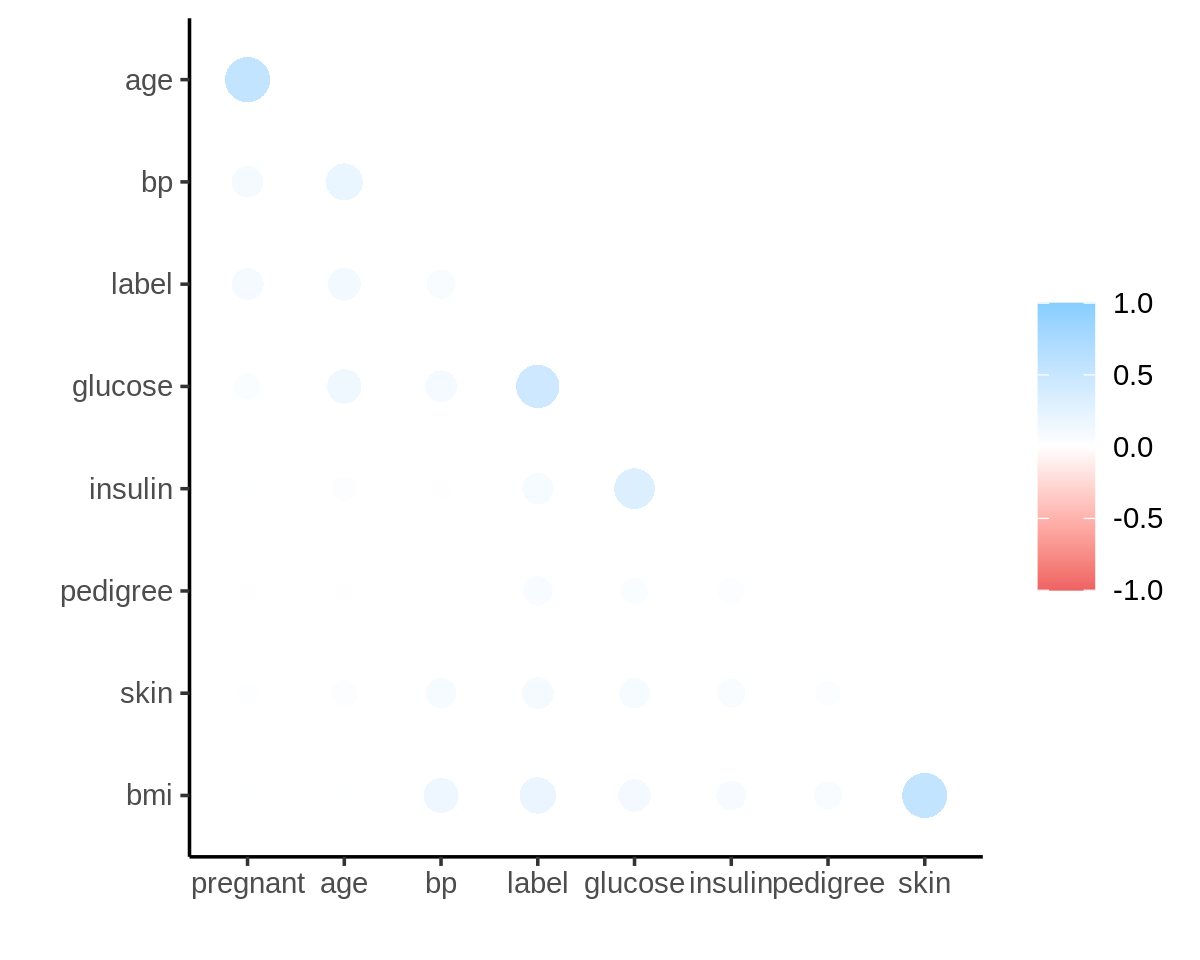

In [140]:
corrMatrix %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="pipe_R" id="jI{JJE%`Lri!8Z9tiY6Y" x="-21" y="-271"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="-vxK9zE!IU_i$Us@*8x!"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="|M8DM]xCy`6T0bV1?R1K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="cu-?GG]G.HrY?/GyE~nE"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="j=a0p{j[O4)zBg1}J3K8"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value></block></xml>

Anything blue is a positive correlation, and anything red is a negative one.
As you can see, most of the negative correlations are weak and so not very interesting. 
There are ~3 moderate positive correlations, arranged on the diagonal.

- `age` & `pregnant`
- `glucose` & `label`
- `insulin` & `glucose`
- `skin` & `bmi`

### Histograms

Another way to try to understand the data is to create histograms of all the variables.
As we previously discussed, a histogram shows you the count (on the y-axis) of the number of data points that fall into a certain range (also called a bin) of the variable.

It can be very tedious to make a separate plot for each variable when you have many variables.
The best way is to do it in a loop:

- `for each item i in list` with `base` do `colnames` using `dataframe`
    - `print` `make plot`
        - with `ggplot2` do `ggplot`
            - using `dataframe`
            - and `aes_string(x=i)`
        - and with `ggplot2` do `geom_histogram`
  
*Note: `aes_string` is used instead of `aes` because `i` is a string, e.g. `"age"` not `age`.*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


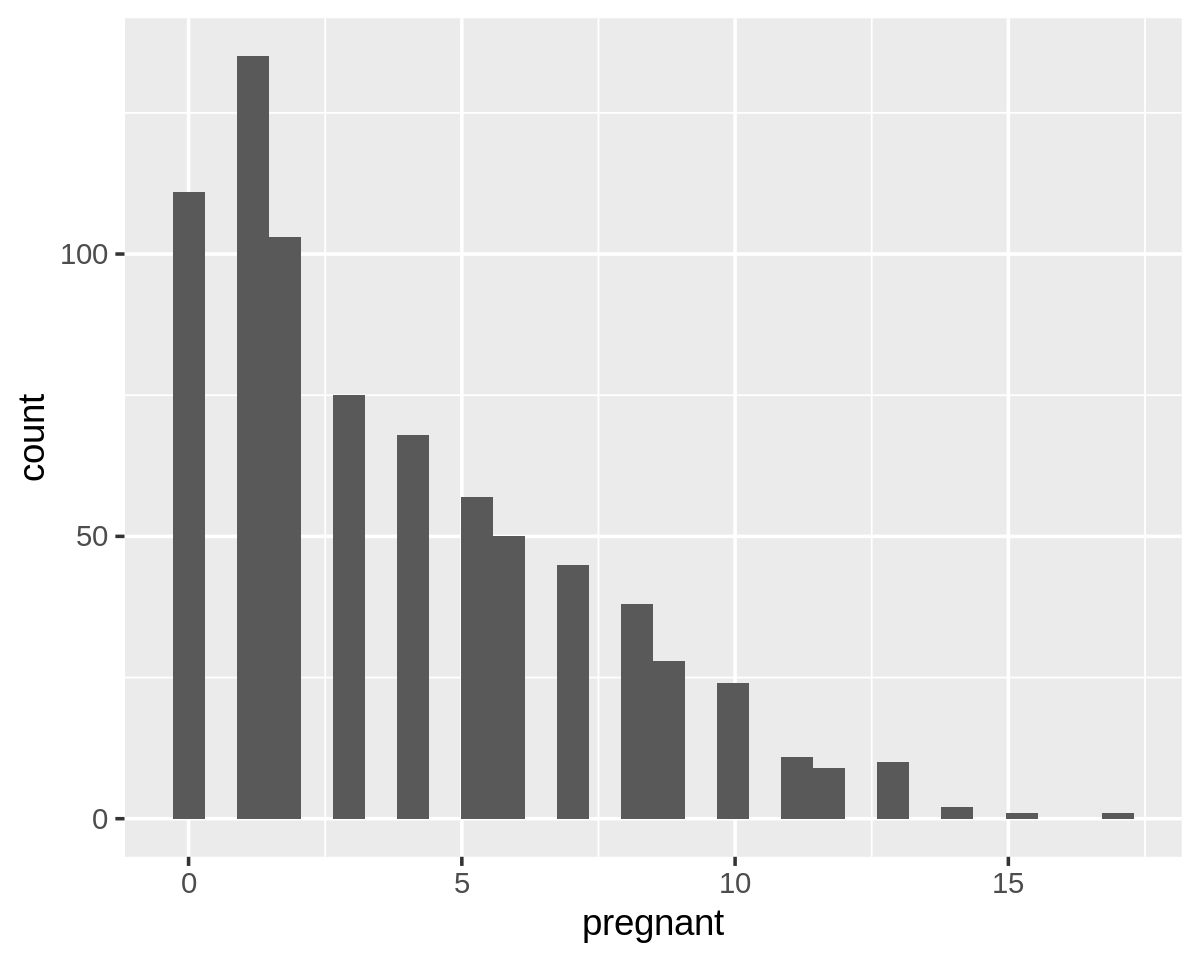

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


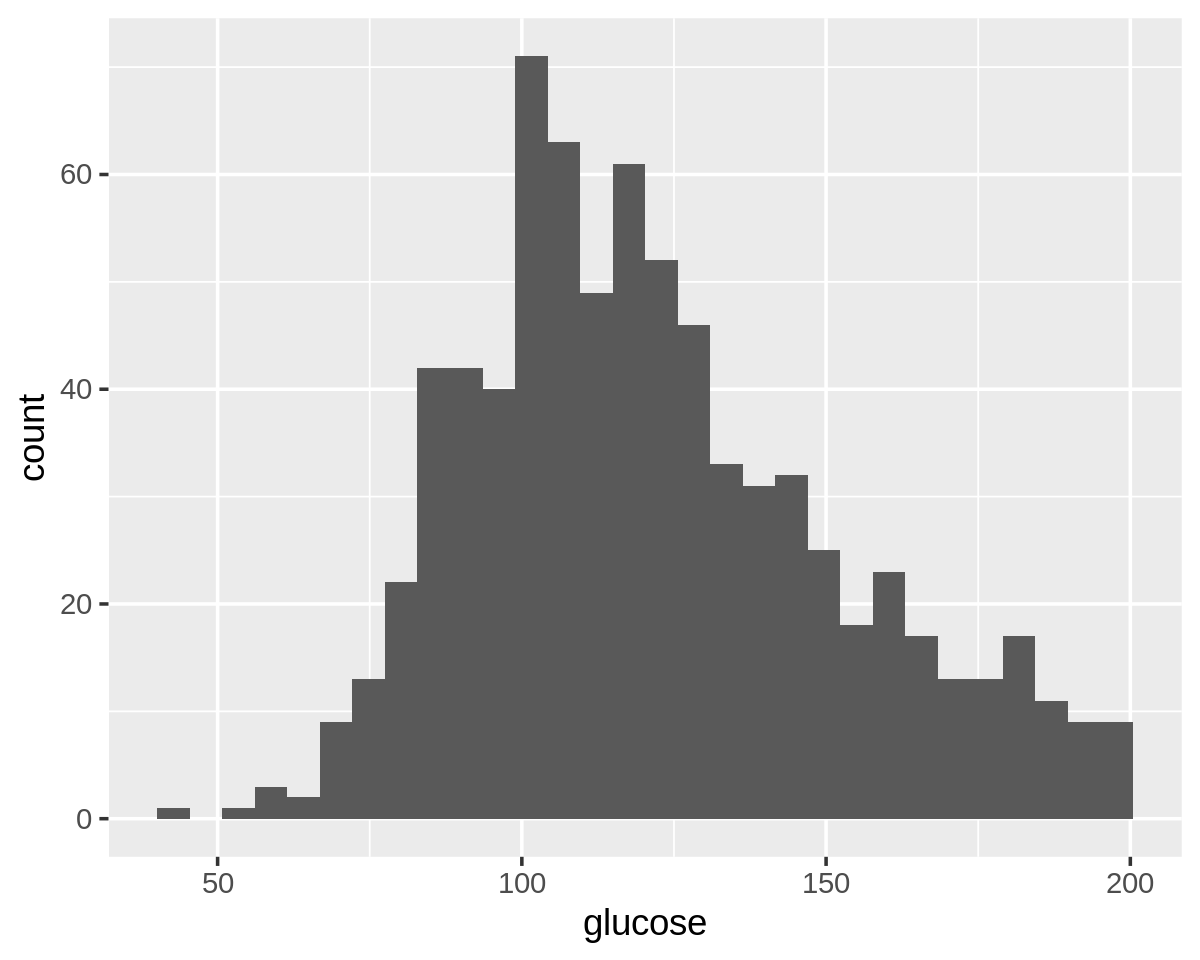

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


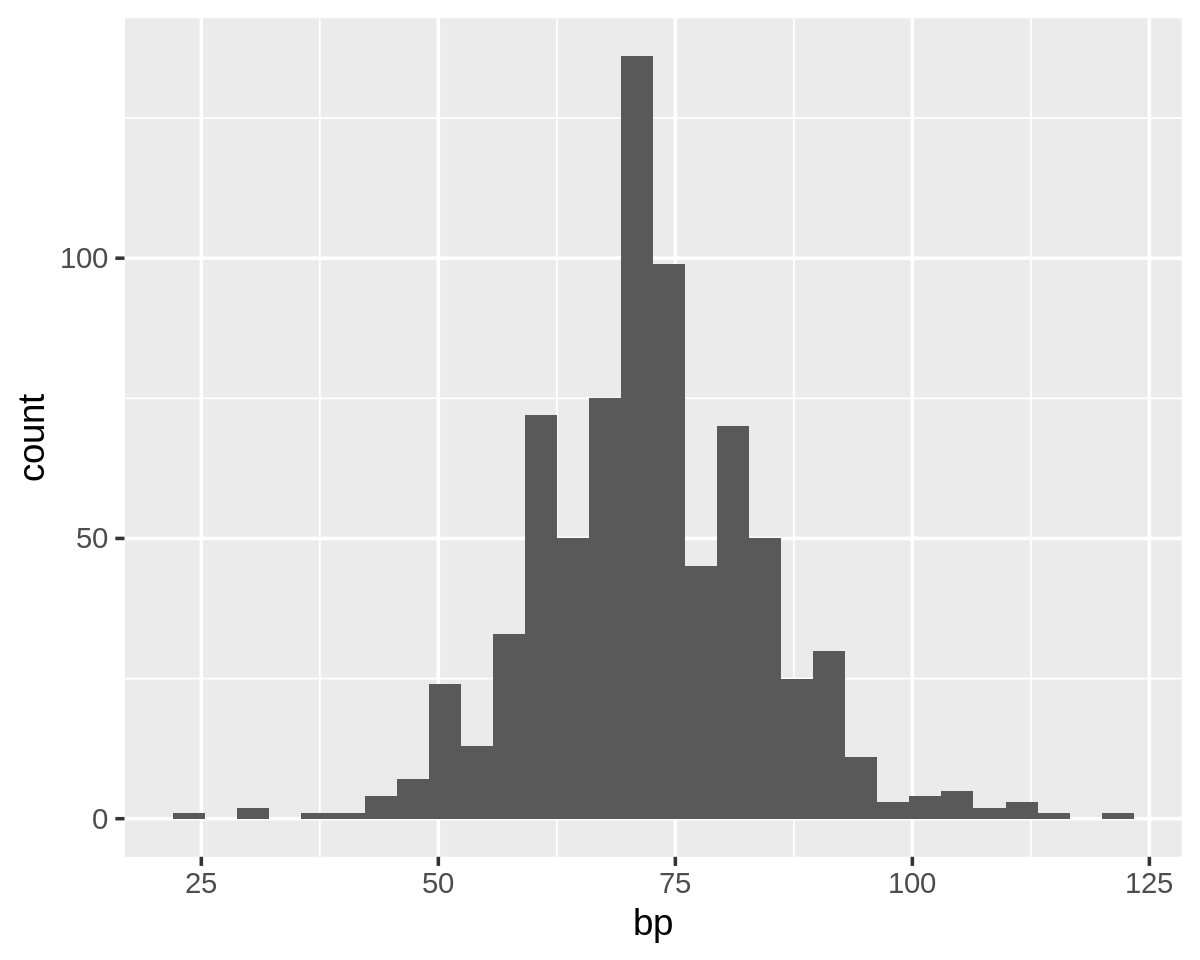

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


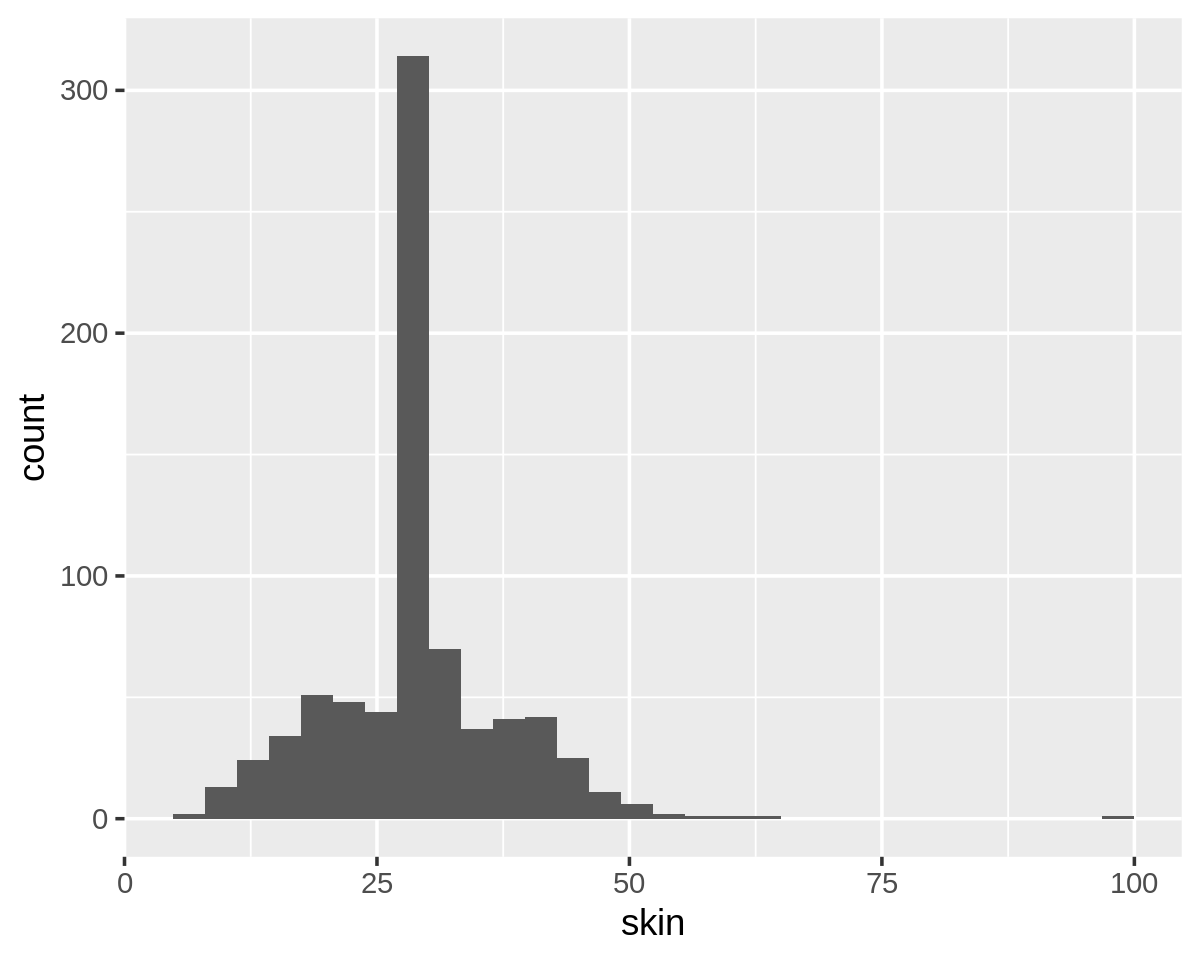

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


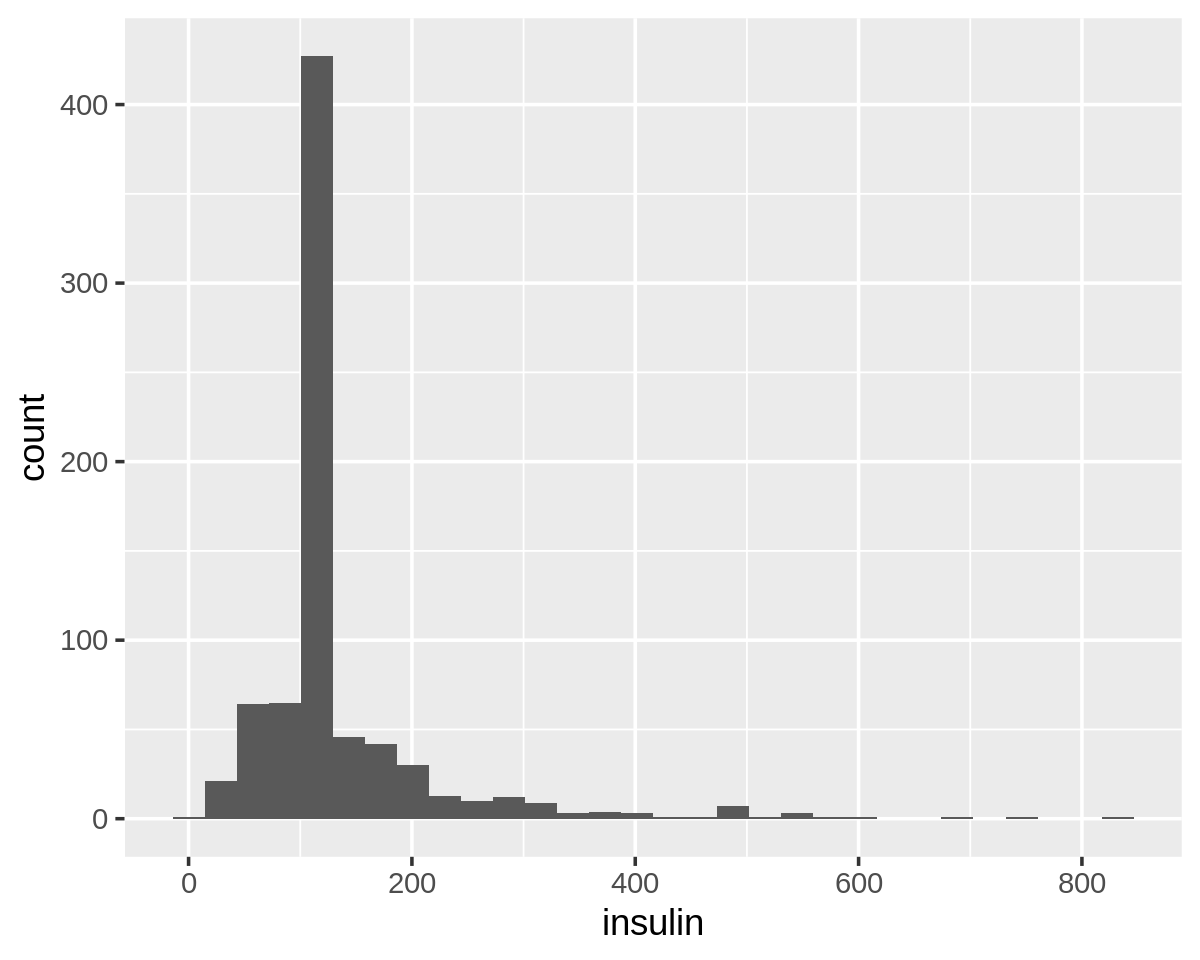

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


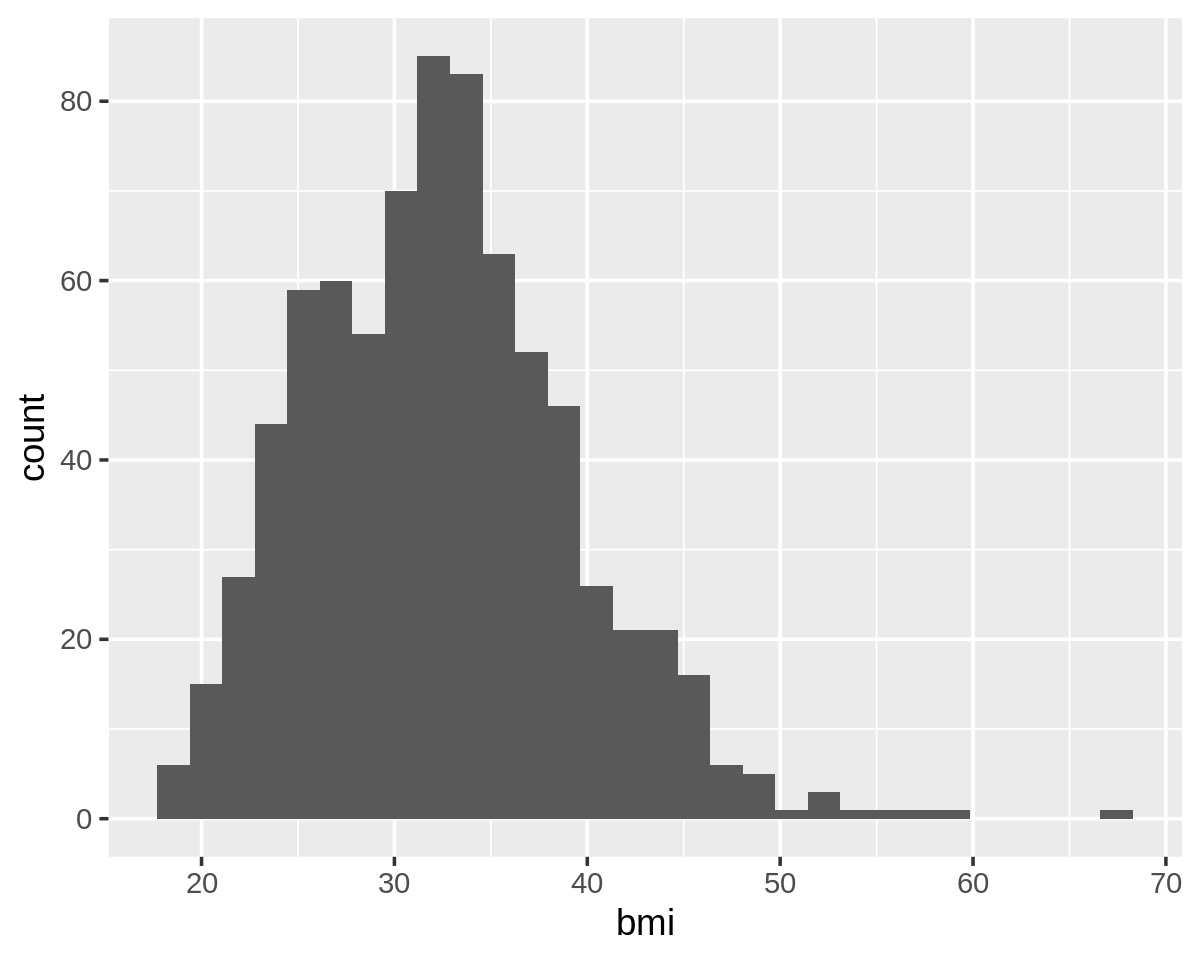

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


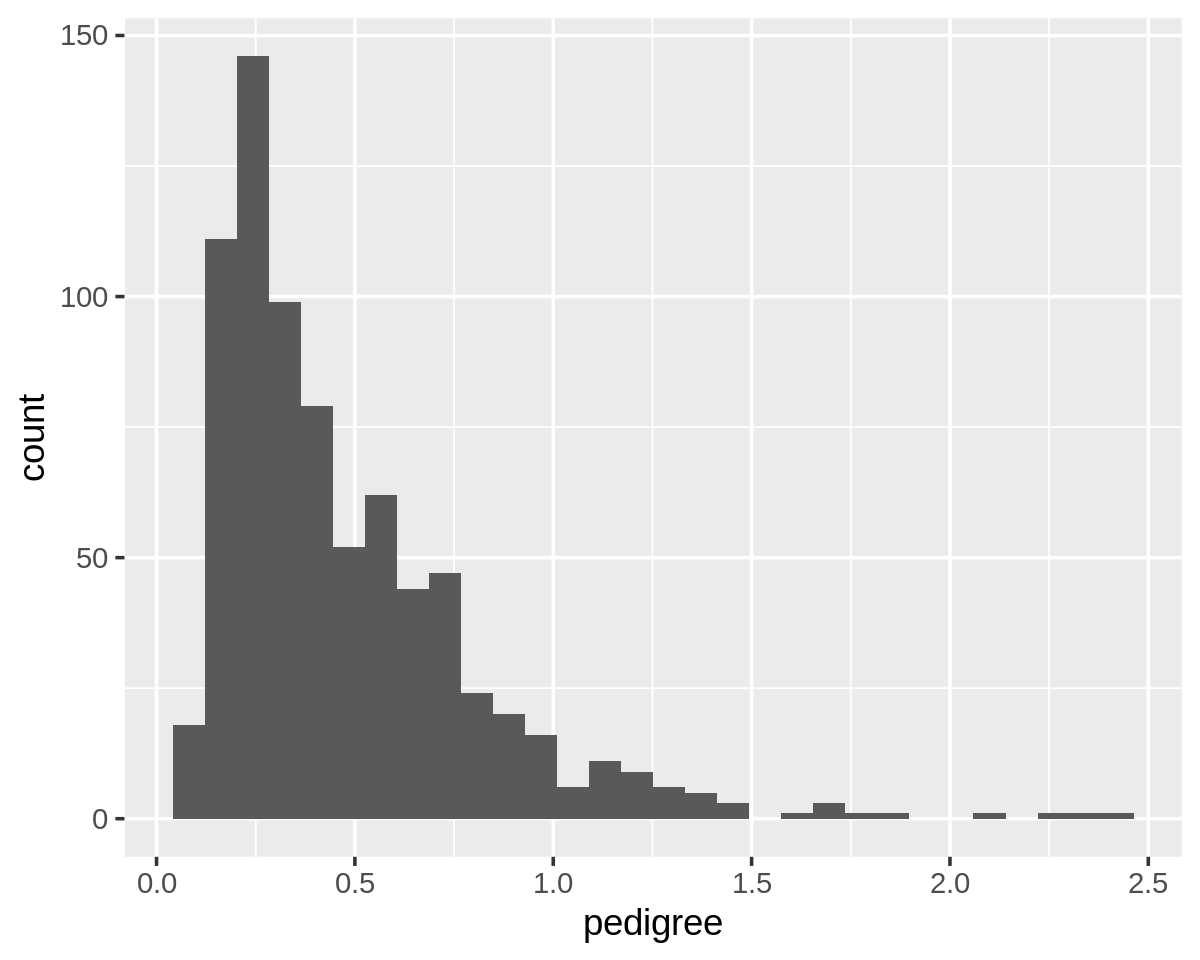

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


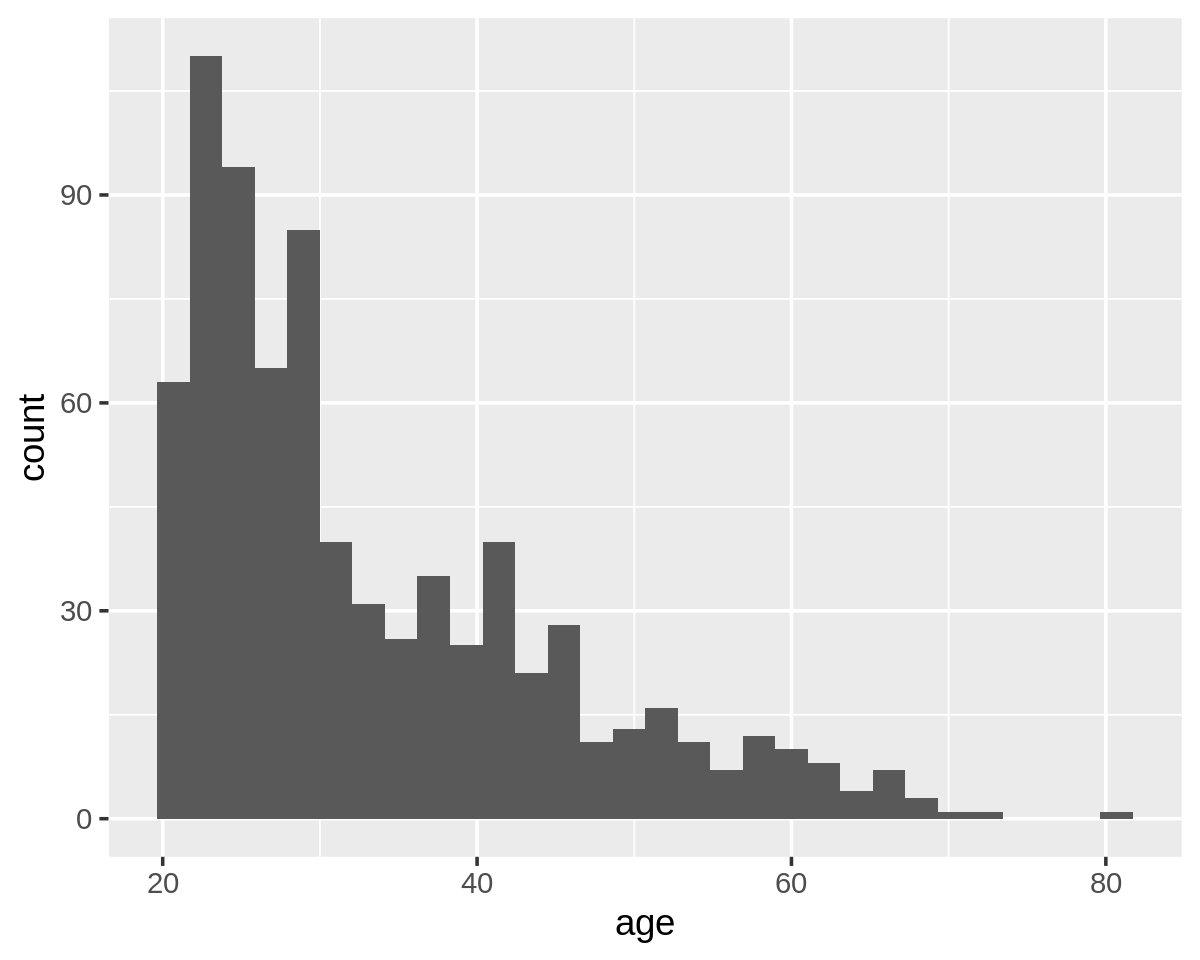

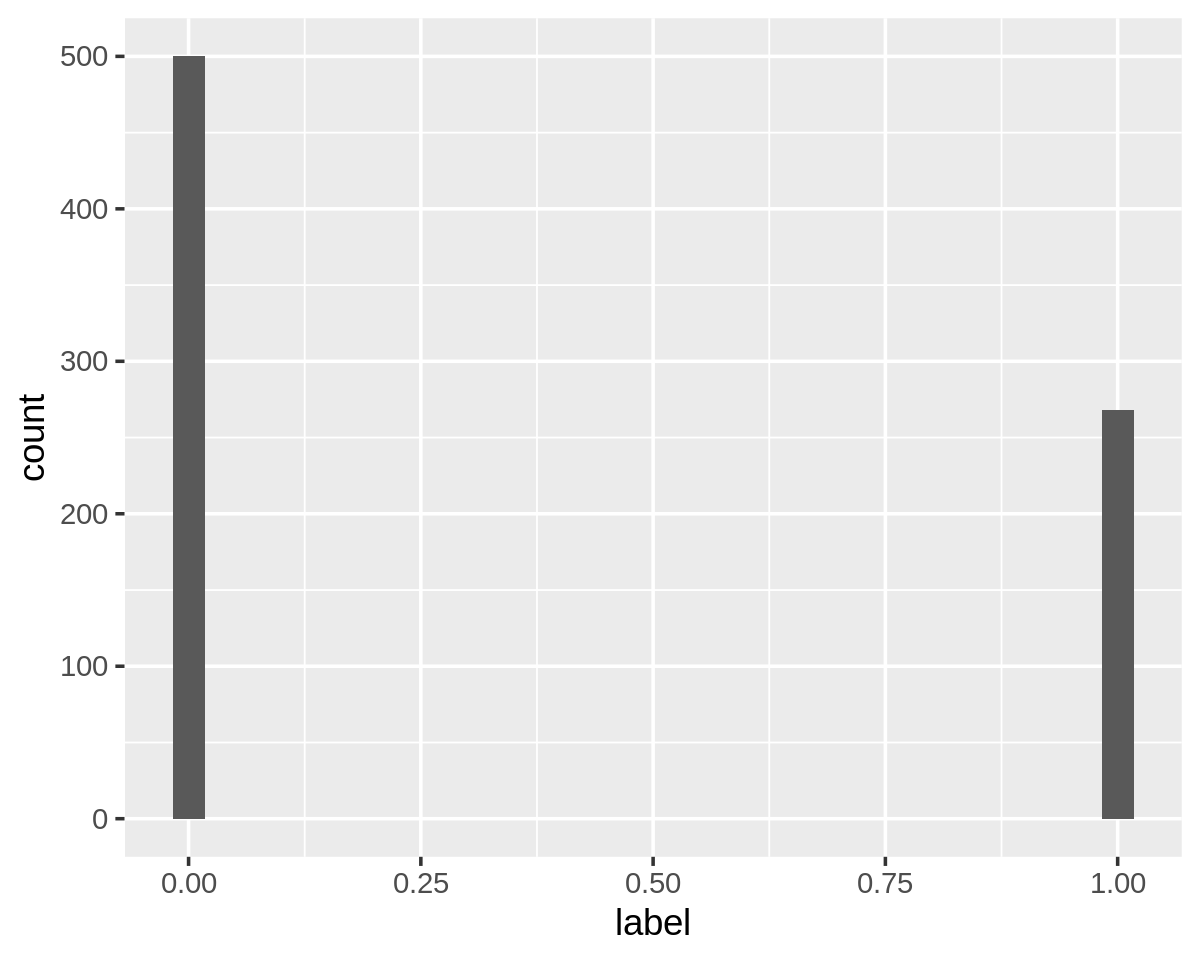

In [141]:
for (i in base::colnames(dataframe)) {
  print(ggplot2::ggplot(dataframe,aes_string(x=i)) +
      ggplot2::geom_histogram());
}

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="XrEpCOC|8}t@X;*q,nyp">i</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="controls_forEach" id="*5E8b}Nh.]%Ff~/Zgk#R" x="-27" y="-317"><field name="VAR" id="XrEpCOC|8}t@X;*q,nyp">i</field><value name="LIST"><block type="varDoMethod_R" id="l2cnIiQKHEb14AlzPLj:"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">colnames</field><data>base:colnames</data><value name="ADD0"><block type="variables_get" id="pI52da:!H4vE(#UGn1Pk"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><statement name="DO"><block type="text_print" id=";bVdG_ttQ{{7}sqqEV2P"><value name="TEXT"><shadow type="text" id="M]]*a~%Jup5t6Jo?El!p"><field name="TEXT">abc</field></shadow><block type="ggplot_plus_R" id="K7Z(@R~Z`u,RO*VDWB^3"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="dRCo{:R}P_?RPw{zOb.y"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id=".%EC|3pdO[kLc_aDu7xr"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="+DY3p:MQP{i94]WqZ@WF"><field name="CODE">aes_string(x=i)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="32Q%F0{GMgKARKJc?TSZ"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></value></block></statement></block></xml>

From these histograms we observe:
    
- Only `glucose`, `bp`, and `bmi` are normal; `skin` would likely be normal but missing values imputed as the median have created a large spike there.
- Everything else has larger mass on the lower end of the scale (i.e. on the left)

## Prepare train/test sets

We need to split the dataframe into training data and testing data.

First, load the package for splitting:

- `library rsample`

In [142]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="g^doBJYp/fk!)^uuYnUf" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Now split the data, but first convert `label` to factor, which is a requirement of the model:

- Set `dataframe` to 
    - `pipe`
        - `dataframe`
        - to with `dplyr` do `mutate`
            - using `label=factor(label)`

- Set `data_split` to `with rsample do initial split`
    - using `dataframe`
    - and `prop=.80`
- Set `data_train` to `with rsample do training`
    - using `data_split`
- Set `data_test` to `with rsample do testing`
    - using `data_split`
- `data_train`

In [161]:
dataframe = dataframe %>%
    dplyr::mutate(label=factor(label))

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="pqe,bA|(visJQd48=Wf~" x="-137" y="113"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="KA=hLd3r{UKxA_qN8jzu"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="qw7eF};{$f3x1Rr0U6gS"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="-00s4E.d(nD9%clg}Wi%"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="GBV01=On`usB9nUSdhBA"><field name="CODE">label=factor(label)</field></block></value></block></value></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,79,60,42,48,43.5,0.678,23,0
1,112,72,30,176,34.4,0.528,25,0
13,76,60,29,125,32.8,0.180,41,0
6,123,72,45,230,33.6,0.733,34,0
5,73,60,29,125,26.8,0.268,27,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,118,64,23,89,32.3,1.731,21,0
3,129,64,29,115,26.4,0.219,28,1
8,188,78,29,125,47.9,0.137,43,1


## Logistic regression model

Our goal is to predict diabetes (`label`) using the other features.
We'll do this using a logistic regression model.

To build the model, load the `recipes` and `workflows` packages, along with `parsnip`, `generics`, `hardhat`, and `broom`:

- `library recipes`
- `library workflows`
- `library parsnip`
- `library generics`
- `library hardhat`
- `library broom`

In [162]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Let's make a workflow to predict `label` using logistic regression, with a step that scales the predictors (here called normalization).
<!-- We also need a step that makes `label` a factor, as this is required by the model. -->


- Set `recipe` to 
    - `pipe` with `recipes` do `recipe`
        - using `label ~ .`
        - and `data = data_train`
    - to with `recipes` do `step_normalize`
        - using with `recipes` do `all_numeric_predictors`
        
<!--     - to with `recipes` do `step_num2factor`
        - using `label`
        - and `levels = c("1","0")`
        - and `transform = function(x) x+1` -->
        
- Set `model` to 
    - `pipe` with `parsnip` do `logistic_reg` 
    - to with `parsnip` do `set_mode` 
        - using `"classification"`
    - then to with `parsnip` do `set_engine`
        - using `"glm"`
- Set `workflow` to 
    - `pipe` with `workflows` do `workflow`
    - to with `workflows` do `add_model`
        - using `model`
    - then to with `workflows` do `add_recipe` 
        - using `recipe`
        
  
<!-- *Note: We could have loaded `label` as a factor or converted outside the workflow.* -->

In [164]:
recipe = recipes::recipe(label ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::logistic_reg() %>%
    parsnip::set_mode("classification") %>%
    parsnip::set_engine("glm")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">label ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">logistic_reg</field><data>parsnip:logistic_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">classification</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">glm</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the workflow:

-  Set `trained_model` to with `generics` do `fit`
    - using `workflow`
    - and `data = data_train`
`trained_model`

In [165]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
(Intercept)     pregnant      glucose           bp         skin      insulin  
   -0.80121      0.34447      1.13500     -0.04440      0.07431     -0.01621  
        bmi     pedigree          age  
    0.64243      0.30293      0.20585  

Degrees of Freedom: 613 Total (i.e. Null);  605 Residual
Null Deviance:	    802.4 
Residual Deviance: 566.5 	AIC: 584.5

Now we can use `augment` to get predicted classes on the test data:


- Set `data_evaluation` to with `generics` do `augment`
    - `trained_model`
    - `data_test`
- `data_evaluation`

In [168]:
data_evaluation = generics::augment(trained_model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable></variables><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU" x="-188" y="87"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label,.pred_class,.pred_0,.pred_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,89,66,23,94,28.1,0.167,21,0,0,0.9629204,0.03707963
10,115,72,29,125,35.3,0.134,29,0,0,0.6372321,0.36276788
10,139,80,29,125,27.1,1.441,57,0,1,0.2299125,0.77008754
5,166,72,19,175,25.8,0.587,51,1,1,0.3483781,0.65162189
13,145,82,19,110,22.2,0.245,57,0,1,0.4791794,0.52082059
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,147,94,41,125,49.3,0.358,27,1,1,0.2260889,0.7739111
1,81,74,41,57,46.3,1.096,32,0,0,0.6573041,0.3426959
4,136,70,29,125,31.2,1.182,22,1,1,0.4835240,0.5164760


## Assessing the model

First load `yardstick` to get performance metrics:

- `library yardstick`

In [169]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:generics’:

    accuracy


The following object is masked from ‘package:readr’:

    spec




To get the accuracy:

- with `yardstick` do `accuracy`
    - using `data_evaluation`
    - and `truth=label`
    - and `estimate=.pred_class`

In [179]:
yardstick::accuracy(data_evaluation,truth=label,estimate=.pred_class)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="varDoMethod_R" id="GcL.?E[fzkY|t_#pWh[)" x="84" y="-223"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="qIy}]~5YnsV%I/vU1xHt"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="m4O~GQ#2!OF9A6,^v9}v"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="qF]YN=^^L81D$`##m~:]"><field name="CODE">estimate=.pred_class</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7792208


To get the recall and precision, just copy the blocks and change `accuracy` to the corresponding metric.

We can actually make this a bit nicer by putting these in a list and piping that list to `dplyr::bind_rows`

- `pipe`
    - `create list with`
        - with `yardstick` do `accuracy`
            - using `data_evaluation`
            - and `truth=label`
            - and `estimate=.pred_class`
        - with `yardstick` do `precision`
            - using `data_evaluation`
            - and `truth=label`
            - and `estimate=.pred_class`
        - with `yardstick` do `recall`
            - using `data_evaluation`
            - and `truth=label`
            - and `estimate=.pred_class`
- to with `dplyr` do `bind_rows`

In [178]:
list(yardstick::accuracy(data_evaluation,truth=label,estimate=.pred_class), yardstick::precision(data_evaluation,truth=label,estimate=.pred_class), yardstick::recall(data_evaluation,truth=label,estimate=.pred_class)) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="3"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7792208
precision,binary,0.8288288
recall,binary,0.8598131


This looks pretty good, but what is it - the metrics for predicting diabetes (1) or predicting not diabetes (0)?

If you recall, the classifier uses the first level of the factor by default, which is `0`.

We can get the same scores for `1` by copying the pipe block above and adding `event_level='second'` to each yardstick call.
Try it below!

In [180]:
list(yardstick::accuracy(data_evaluation,truth=label,estimate=.pred_class,event_level="second"), yardstick::precision(data_evaluation,truth=label,estimate=.pred_class,event_level="second"), yardstick::recall(data_evaluation,truth=label,estimate=.pred_class,event_level="second")) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="3"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="J)M[q_I1_1xDQ8G|G?TL"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="iFhN%71!A{wev;*O;Bue"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=label</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="4WN|_|wM!~2PgP:hrc@!"><field name="CODE">event_level="second"</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7792208
precision,binary,0.6511628
recall,binary,0.5957447


As you can see, the accuracy didn't change, but the other metrics changed quite a bit.
Clearly we are not as good at predicting diabetes, probably because it is uncommon in the data.

Finally, let's create an ROC plot. 
An [ROC plot](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) shows the trade-off between the true positive rate (recall) and the false positive rate for our classifier. 
This plot is useful because it helps us understand how our model would behave at different levels of these two values.

To create the plot, we need predicted probabilities (for class `1`) and to again specify that the event is the second level of the factor:

- `pipe`
    - `data_evaluation`
    - to with `yardstick` do `roc_curve\
        - using `truth = label`
        - `.pred_1`
        - `event_level = "second"`
    - and with `ggplot2` do `autoplot`


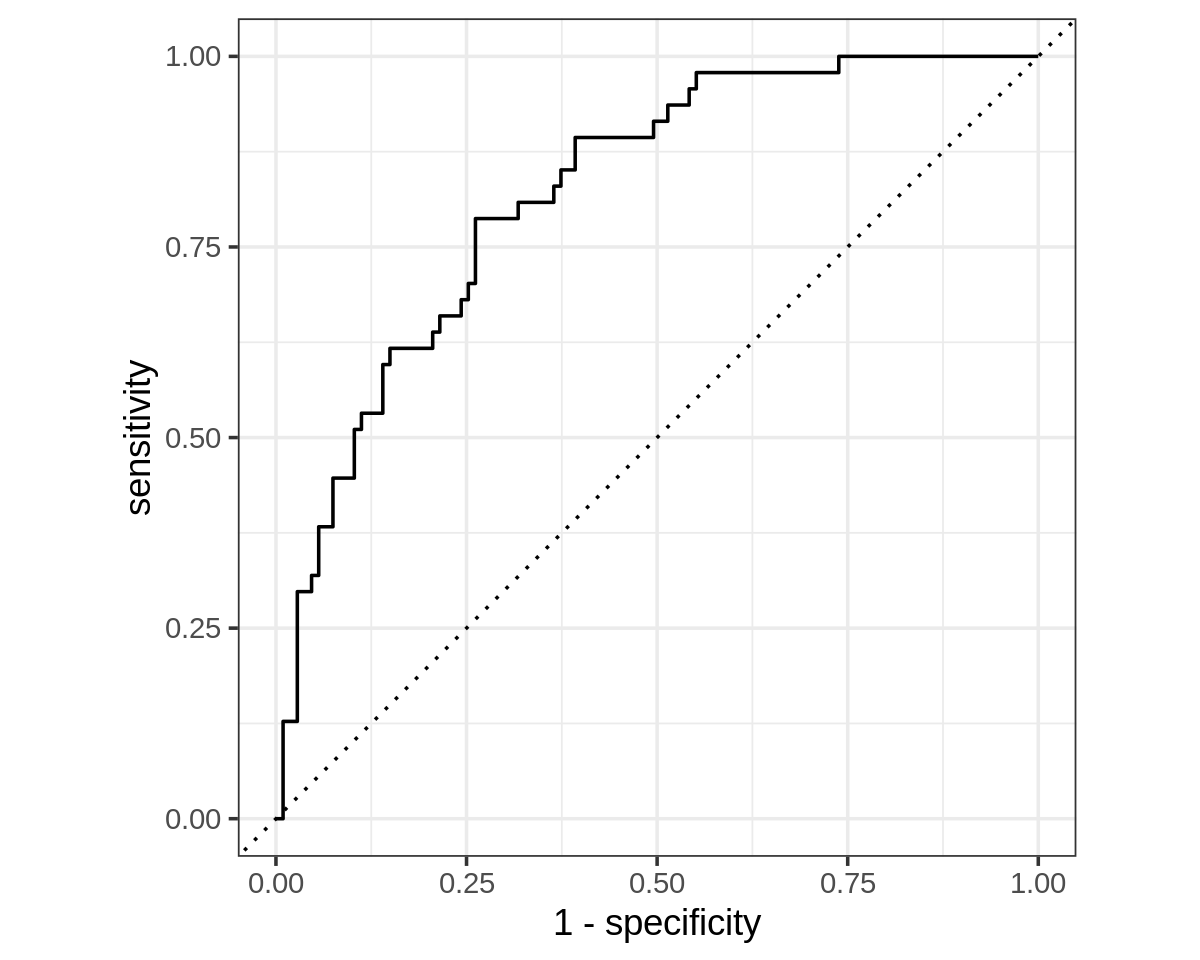

In [188]:
data_evaluation %>%
    yardstick::roc_curve(truth = label,.pred_1,event_level = "second") %>%
    ggplot2::autoplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="0oRKZmgN`nZ)x[DQ@:m{" x="9" y="-281"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id=".AHsRo-cMxQ$}nN-6C[T"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="M*o3?t]V^IYgC3ezSJv["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">roc_curve</field><data>yardstick:roc_curve</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="|!jt(JB)U%%BLwZ0k$di"><field name="CODE">truth = label</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="F|=.Cpa-q1l%!bd*d,Mw"><field name="CODE">.pred_1</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="Po5g[!%aRnjUMF]!K#aw"><field name="CODE">event_level = "second"</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="2!x0datsv`C?%0_J6Z3c"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">autoplot</field><data>ggplot2:autoplot</data></block></value></block></xml>

The upward curve above the dotted diagonal indicates the classifier is working - if the classifier were perfect, the curve would hug the left and top edges of the plot.

We can see that if we accept a false alarm rate of about .50, then the true positive rate would be about .83.
Currently our true positive rate (recall) is about .60, so our false positive rate is about .12.

Whether one of these options is better than the other typically depends on the cost of being wrong.
If we would rather overdiagnose diabetes (tell someone they have it when they don't), then it is OK to have a higher false positive rate, because that way we won't miss as many cases of diabetes.

<!--  -->